# ECS659U- Coursework
### student name: NASMIN UDDIN
##### (available fragments of code from ECS659U/P module have been used throught the implementation of the network)

In [2]:
#import my_utils as mu
import my_utils as mu
import torch
from torch import nn
from IPython import display
import time

c:\Users\nasmi\anaconda3\lib\site-packages\torch\cuda\__init__.py:82: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  C:\cb\pytorch_1000000000000\work\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
#read dataset 
batch_size = 256
train_iter, test_iter = mu.load_data_fashion_mnist(batch_size)

26422272it [00:16, 1620871.71it/s]                              


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



29696it [00:00, 29599346.86it/s]         

Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



4422656it [00:00, 154337377.60it/s]        


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



6144it [00:00, ?it/s]                   

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



In [4]:
#create dataloaders
X, y = next(iter(train_iter)) # first batch

## stem diagram:
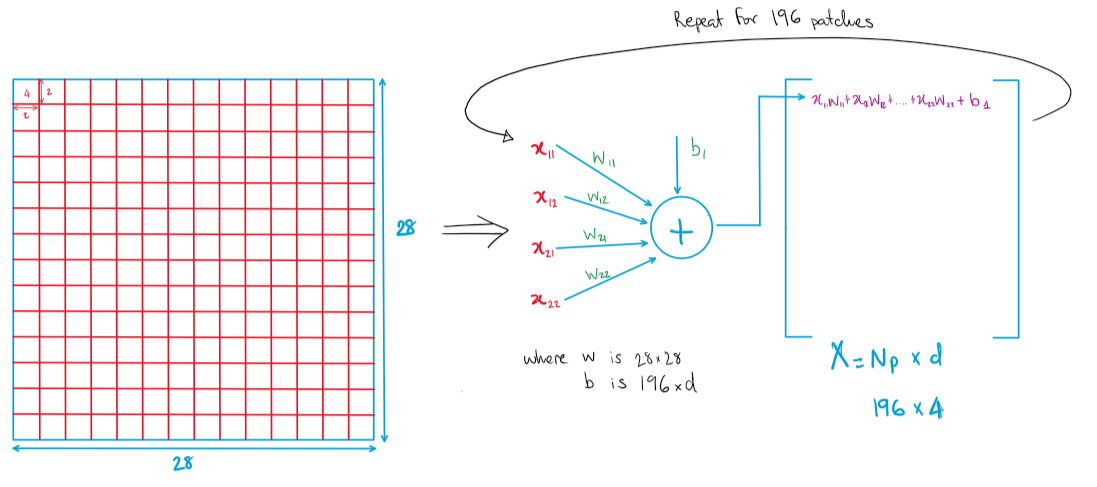
## Backbone and classifier diagram:
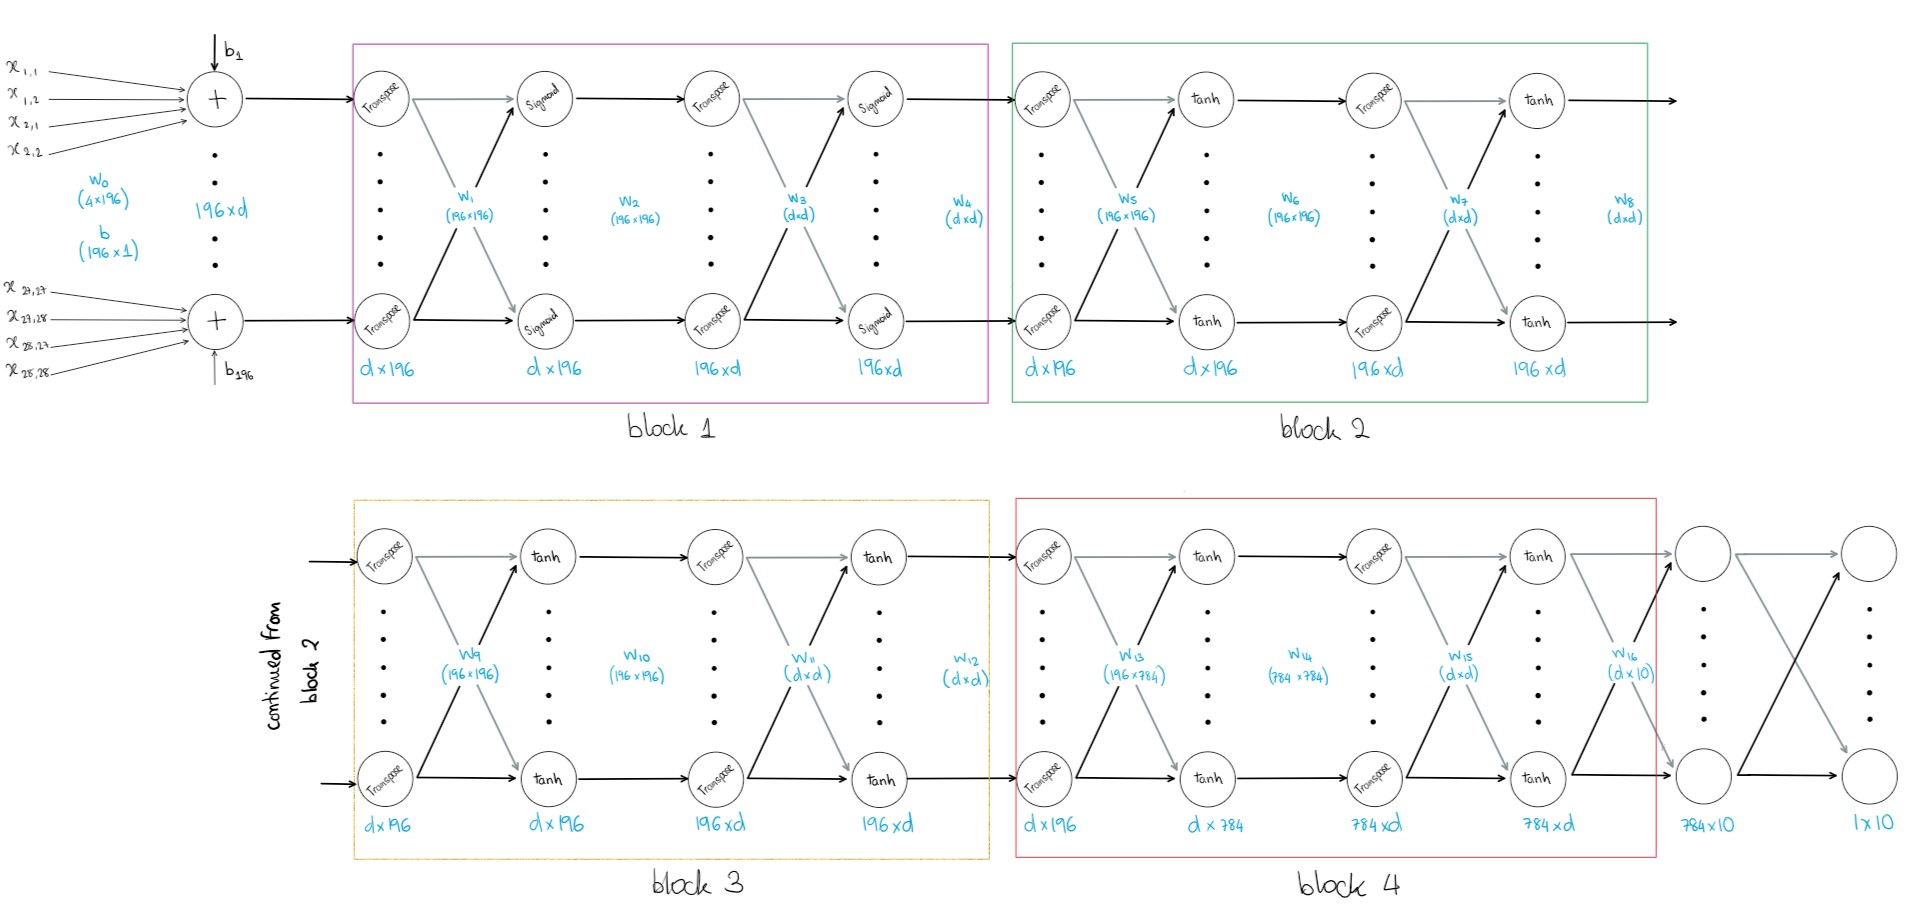

In [6]:
# implementation of stem, backbone and classifier

class NasNet(torch.nn.Module):
    def __init__(self, patch_size, d):
        super(NasNet, self).__init__()
        self.patch_size = patch_size
        self.d = d
        patches= 196 #number of patches
        #weight and biases for each patch
        self.Linear0 = nn.Linear(patch_size*patch_size, d)
        #block 1 weights
        self.Linear1 = nn.Linear(patches, patches, bias = False)
        self.Linear2 = nn.Linear(patches, patches, bias = False)
        self.Linear3 = nn.Linear(d, d, bias = False)
        self.Linear4 = nn.Linear(d, d, bias = False)
        #block 2 weights
        self.Linear5 = nn.Linear(patches, patches, bias = False)
        self.Linear6 = nn.Linear(patches,patches, bias = False)
        self.Linear7 = nn.Linear(d, d, bias = False)
        self.Linear8 = nn.Linear(d, d, bias = False)
        #block 3 weights
        self.Linear9 = nn.Linear(patches,patches, bias = False)
        self.Linear10 = nn.Linear(patches, patches, bias = False)
        self.Linear11 = nn.Linear(d, d, bias = False)
        self.Linear12 = nn.Linear(d, d, bias = False)
        #block 4 weights with no bias     
        self.Linear13 = nn.Linear(patches, 784, bias = False)
        self.Linear14 = nn.Linear(784, 784, bias = False)
        self.Linear15 = nn.Linear(d, d, bias = False)
        self.Linear16 = nn.Linear(d, 10, bias = False)
        
        #initialise tanh activation function
        self.tanh = nn.Tanh()
        #initialise sigmoid activation function
        self.Sigmoid = nn.Sigmoid()

        
    def forward(self, x):
        #STEM:
        #make the patches
        x=x.unfold(2,patch_size,patch_size).unfold(3,patch_size,patch_size)
        #vectorise each 2x2 patch (4 is the size of the resulting vector)
        x=torch.flatten(x,start_dim=4)
        #apply weights and biases to the patches
        out= self.Linear0(x) 
        #flattening patches
        out=torch.flatten(out,start_dim=2,end_dim=3) 
        
        #BACKBONE (4 blocks):
        #block 1 Sigmoid activation function
        out=torch.transpose(out, 2, 3) #transpose the matrix 
        out= self.Linear1(out)
        out=self.Sigmoid(out)          #apply activation function
        out= self.Linear2(out)
        out= torch.transpose(out,2,3)  #transpose the matrix
        out= self.Linear3(out)
        out= self.Sigmoid(out)         #apply activation function
        out= self.Linear4(out)
        #block 2 tanh activation function
        out=torch.transpose(out, 2, 3) #transpose the matrix 
        out= self.Linear5(out)
        out= self.tanh(out)            #apply activation function
        out= self.Linear6(out)
        out=torch.transpose(out, 2, 3) #transpose the matrix
        out= self.Linear7(out)
        out=self.tanh(out)             #apply activation function
        out=self.Linear8(out)
        #block 3 tanh activation function
        out=torch.transpose(out, 2, 3) #transpose the matrix 
        out= self.Linear9(out)
        out= self.tanh(out)            #apply activation function
        out= self.Linear10(out)
        out=torch.transpose(out, 2, 3) #transpose the matrix
        out= self.Linear11(out)
        out=self.tanh(out)             #apply activation function
        out=self.Linear12(out)
        #block 4 tanh activation function
        out=torch.transpose(out, 2, 3) #transpose the matrix 
        out= self.Linear13(out)
        out= self.tanh(out)            #apply activation function
        out= self.Linear14(out)
        out=torch.transpose(out, 2, 3) #transpose the matrix 
        out= self.Linear15(out)
        out=self.tanh(out)             #apply activation function
        out=self.Linear16(out)
        
        #CLASSIFIER:
        out= torch.mean(out,2,True) #calculate mean features
        out= torch.squeeze(out)     #get rid of dimensions with size=1
        
        return out
    
patch_size, d = 2,4 #set the values, d represent output values


In [7]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d: #by checking the type we can init different layers in different ways
        torch.nn.init.xavier_uniform_(m.weight)          

#model = LeNet(num_outputs)
model = NasNet(patch_size, d)
model.apply(init_weights);
print(model)

NasNet(
  (Linear0): Linear(in_features=4, out_features=4, bias=True)
  (Linear1): Linear(in_features=196, out_features=196, bias=False)
  (Linear2): Linear(in_features=196, out_features=196, bias=False)
  (Linear3): Linear(in_features=4, out_features=4, bias=False)
  (Linear4): Linear(in_features=4, out_features=4, bias=False)
  (Linear5): Linear(in_features=196, out_features=196, bias=False)
  (Linear6): Linear(in_features=196, out_features=196, bias=False)
  (Linear7): Linear(in_features=4, out_features=4, bias=False)
  (Linear8): Linear(in_features=4, out_features=4, bias=False)
  (Linear9): Linear(in_features=196, out_features=196, bias=False)
  (Linear10): Linear(in_features=196, out_features=196, bias=False)
  (Linear11): Linear(in_features=4, out_features=4, bias=False)
  (Linear12): Linear(in_features=4, out_features=4, bias=False)
  (Linear13): Linear(in_features=196, out_features=784, bias=False)
  (Linear14): Linear(in_features=784, out_features=784, bias=False)
  (Linear15

In [8]:
output=model(X) #store the matrix in output

In [9]:
print(output.size()) #print the size of the matrix


torch.Size([256, 10])


## Training the network:

In [10]:
start_time = time.time() #initiate the timer

loss = nn.CrossEntropyLoss() #loss fuction
wd,lr = 0.000, 0.9 #weight decay and learning rate
#optimization algorithm
optimizer = torch.optim.SGD(model.parameters(),weight_decay=wd, lr=lr) #stochastic gradient descent

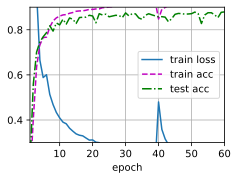

In [11]:
num_epochs = 60 #number of epochs
mu.train_ch3(model, train_iter, test_iter, loss, num_epochs, optimizer) #SoftMax regression classifier
elapsed_time = time.time() - start_time #calculate the time taken to train the model in seconds

In [12]:
accuracy= mu.evaluate_accuracy(model, test_iter) 
print(accuracy) #print the test accuracy
train_acc= mu.evaluate_accuracy(model, train_iter)
print(train_acc) #print the train accuracy

0.8792
0.93495


In [13]:
print(elapsed_time/60) #output the time taken to train the model in minutes

25.866985241572063
